# Momento de HU

## What are Image Moments?

Image moments are a weighted average of image pixel intensities. Let’s pick a simple example to understand the previous statement.

For simplicity, let us consider a single channel binary image I. The pixel intensity at location (x,y) is given by I(x,y). Note for a binary image I(x,y) can take a value of 0 or 1.

The simplest kind of moment we can define is given below

(1) \begin{align*} M = \sum_{x} \sum_{y} I(x,y) \end{align*}

All we are doing in the above equation is calculating the sum of all pixel intensities. In other words, all pixel intensities are weighted only based on their intensity, but not based on their location in the image.

For a binary image, the above moment can be interpreted in a few different ways

It is the number of white pixels ( i.e. intensity = 1 ).
It is area of white region in the image.
So far you may not be impressed with image moments, but here is something interesting. Figure 1 contains three binary images — S ( S0.png ), rotated S ( S5.png ), and K ( K0.png ).

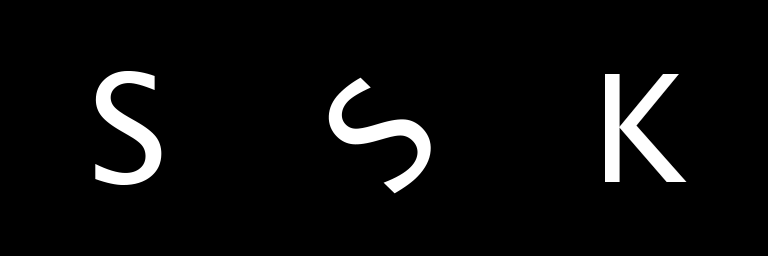

This image moment for S and rotated S will be very close, and the moment for K will be different.

For two shapes to be the same, the above image moment will necessarily be the same, but it is not a sufficient condition. We can easily construct two images where the above moment is the same, but they look very different.

## How are image moments calculated?
Let’s look at some more complex moments.

(2) \begin{align*} M_{ij} = \sum_{x} \sum_{y} x^{i} y^{j} I(x,y) \end{align*}

where i and j are integers ( e.g. 0, 1, 2 ….). These moments are often referred to as raw moments to distinguish them from central moments mentioned later in this article.

Note the above moments depend on the intensity of pixels and their location in the image. So intuitively these moments are capturing some notion of shape.

## What are Hu Moments?
It is great that central moments are translation invariant. But that is not enough for shape matching. We would like to calculate moments that are invariant to translation, scale, and rotation as shown in the Figure below.

Fortunately, we can in fact calculate such moments and they are called Hu Moments.

### Definition
<p>Hu Moments ( or rather Hu moment invariants ) are a set of 7 numbers calculated using central moments that are invariant to image transformations. The first 6 moments have been proved to be invariant to translation, scale, and rotation, and reflection. While the 7th moment’s sign changes for image reflection.
</p>

The 7 moments are calculated using the following formulae :

(6) \begin{align*} h_0 &= \eta_{20} + \eta_{02} \\ h_1 &= (\eta_{20} - \eta_{02})^2 + 4 \eta_{11}^2 \\ h_2 &= (\eta_{30} - 3 \eta_{12})^2 + (3 \eta_{21} - \eta_{03})^2 \\ h_3 &= (\eta_{30} + \eta_{12})^2 + (\eta_{21} + \eta_{03})^2 \\ h_4 &= (\eta_{30} - 3 \eta_{12})(\eta_{30} + \eta_{12})[(\eta_{30} + \eta_{12})^2 - 3 (\eta_{21} + \eta_{03})^2] + (3 \eta_{21} - \eta_{03})[3 (\eta_{30} + \eta_{12})^2 - (\eta_{21} + \eta_{03})^2] \\ h_5 &= (\eta_{20} - \eta_{02})[(\eta_{30} + \eta_{12})^2 - (\eta_{21} + \eta_{03})^2 + 4 \eta_{11} (\eta_{30} + \eta_{12})(\eta_{21} + \eta_{03})] \\ h_6 &= (3\eta_{21} - \eta_{03})(\eta_{30} + \eta_{12})[(\eta_{30} + \eta_{12})^2 - 3(\eta_{21} + \eta_{03})^2] + (\eta_{30} - 3\eta_{12})(\eta_{21} + \eta_{03})[3(\eta_{30} + \eta_{12})^2 - (\eta_{21} + \eta_{03})^2] \end{align*}



## how to calculate

using OpenCv

In [1]:
import cv2

image = cv2.imread("data/diamond.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

moments = cv2.HuMoments(cv2.moments(image)).flatten()

print(moments)

[ 6.53608067e-04  6.07480284e-16  9.67218398e-18  1.40311655e-19
 -1.18450102e-37  8.60883492e-28 -1.12639633e-37]
